In [974]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(10)))

def y_gen(x):
    h_11 = math.tanh(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_21 = 1/(1 + np.exp(-(paras[6] * h_11 + paras[7] * h_12 + paras[8] * h_13 + paras[9])))
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

#Converting the y to matrix so that the mathematical operations are easy to compute for back propogation
#y=np.asmatrix(y).T

In [975]:
# Spliting dataset into training, validation, and test.
# DO NOT MODIFY THIS PART

from sklearn.model_selection import train_test_split

r = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r)

x_val = x_train[:int(n*r)]
partial_x_train = x_train[int(n*r):]
y_val = y_train[:int(n*r)]
partial_y_train = y_train[int(n*r):]

*** Write down your answer here ***

Formula of bias for layer 2

$$\frac{\partial L}{\partial b^2} = \begin{bmatrix}
    \frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}}
    * \frac{\partial a^2_{1}}{\partial b^2}
\end{bmatrix} =     \begin{bmatrix}
        (\hat y_{1}-y_{1})*1*(1-\hat y_{1})*\hat y_{1}*1
    \end{bmatrix} = \begin{bmatrix}
        (\hat y_{1}-y_{1})*(1-\hat y_{1})*\hat y_{1}
    \end{bmatrix}
$$

Formula of weights of layer 2

$$\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}} \\
\frac{\partial L}{\partial w^2_{31}}
\end{bmatrix} = \begin{bmatrix}
\frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial w^2_{11}}\\
\frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial w^2_{21}} \\
\frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial w^2_{31}}
\end{bmatrix} = \begin{bmatrix}
(\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*h^1_{1}\\
(\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*h^1_{2}\\
(\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*h^1_{3}
\end{bmatrix} $$



Formula of biases of layer 1
$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}\\
\frac{\partial L}{\partial b^1_3}
\end{bmatrix} = \begin{bmatrix}
(\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{11}*(1-(h^1_{1})^2) \\ (\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{21}*(1-(h^1_{2})^2) \\ (\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{31}*(1-(h^1_{3})^2)
\end{bmatrix}
$$


$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}\\
\frac{\partial L}{\partial b^1_3}
\end{bmatrix} = \begin{bmatrix}
    \frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{1}} * \frac{\partial h^1_{1}}{\partial a^1_{1}} * \frac{\partial a^1_{1}}{\partial b^1_{1}} \\ \frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{2}} * \frac{\partial h^1_{2}}{\partial a^1_{2}} * \frac{\partial a^1_{2}}{\partial b^1_{2}} \\ \frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{3}} * \frac{\partial h^1_{3}}{\partial a^1_{3}} * \frac{\partial a^1_{3}}{\partial b^1_{3}}
\end{bmatrix}
$$

Formula of weights of layer 1
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}} & \frac{\partial L}{\partial w^1_{13}} \\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}  & \frac{\partial L}{\partial w^1_{23}}
\end{bmatrix} = \begin{bmatrix}
(\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{11}*(1-(h^1_{1})^2)*x_{1} & (\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{21}*(1-(h^1_{2})^2)*x_{1} & (\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{31}*(1-(h^1_{3})^2)*x_{1} \\ (\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{11}*(1-(h^1_{1})^2)*x_{2} & (\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{21}*(1-(h^1_{2})^2)*x_{2} & (\hat y_{1}-y_{1})*(1- \hat y_{1})*\hat y_{1}*w^2_{31}*(1-(h^1_{3})^2)*x_{2}
\end{bmatrix}
$$



$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}} & \frac{\partial L}{\partial w^1_{13}} \\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}  & \frac{\partial L}{\partial w^1_{23}}
\end{bmatrix} = \begin{bmatrix}
\frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{1}} * \frac{\partial h^1_{1}}{\partial a^1_{1}} * \frac{\partial a^1_{1}}{\partial w^1_{11}} & \frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{2}} * \frac{\partial h^1_{2}}{\partial a^1_{2}} * \frac{\partial a^1_{2}}{\partial w^1_{12}} & \frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{3}} * \frac{\partial h^1_{3}}{\partial a^1_{3}} * \frac{\partial a^1_{3}}{\partial w^1_{13}} \\
\frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{1}} * \frac{\partial h^1_{1}}{\partial a^1_{1}} * \frac{\partial a^1_{1}}{\partial w^1_{21}} & \frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{2}} * \frac{\partial h^1_{2}}{\partial a^1_{2}} * \frac{\partial a^1_{2}}{\partial w^1_{22}} & \frac{\partial L}{\partial \hat y_{1}} * \frac{\partial \hat y_{1}}{\partial h^2_{1}} * \frac{\partial h^2_{1}}{\partial a^2_{1}} * \frac{\partial a^2_{1}}{\partial h^1_{3}} * \frac{\partial h^1_{3}}{\partial a^1_{3}} * \frac{\partial a^1_{3}}{\partial w^1_{23}}
\end{bmatrix} 
$$

In [976]:
# Replace this part with your own code without using any deep learning library
'''
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(2, activation='tanh', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='mse')
history = model.fit(partial_x_train, partial_y_train, epochs=60, batch_size=1, validation_data=(x_val, y_val))
history_dict = history.history

# Your program should store the training loss and the validation loss for each epoch
# A list of traing losses -> loss_values
# A list of validation losses -> val_loss_values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Your program should return the prediction for a given input.
y_pred = model.predict(x_test)
'''

"\nfrom keras import models\nfrom keras import layers\nfrom keras import optimizers\n\nmodel = models.Sequential()\nmodel.add(layers.Dense(2, activation='tanh', input_shape=(2,)))\nmodel.add(layers.Dense(1, activation='sigmoid'))\nmodel.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='mse')\nhistory = model.fit(partial_x_train, partial_y_train, epochs=60, batch_size=1, validation_data=(x_val, y_val))\nhistory_dict = history.history\n\n# Your program should store the training loss and the validation loss for each epoch\n# A list of traing losses -> loss_values\n# A list of validation losses -> val_loss_values\nloss_values = history_dict['loss']\nval_loss_values = history_dict['val_loss']\n# Your program should return the prediction for a given input.\ny_pred = model.predict(x_test)\n"

In [977]:
# Initializing weights and bias
W1 = np.random.randn(2,3)
b1 = np.random.randn(1,3)
W2 = np.random.randn(3,1)
b2 = np.random.randn(1,1)

#MSE Loss function
def loss_function(x,y):
    return np.mean(np.square(y-x))

#Defining sigmoid activation function
def sigmoid(a):
    return 1/(1 + np.exp(-a))

#Defining forward propogation
def forward_propogation(X):
    global W2
    global b2
    global W1
    global b1
    a1 = np.dot(X,W1) + b1
    h1 = np.tanh(a1)
    a2 = np.dot(h1,W2) + b2
    h2 = sigmoid(a2)
    return (h1,h2)

learning_rate = 0.01

#Defining backword propogation
def backward_propogation(h1,y_hat,X,Y):
    global W2
    global b2
    global W1
    global b1
    n=len(X)
    Y=np.asmatrix(Y).T
    dh2_da2 = (y_hat - Y)*(1-y_hat).T * y_hat
    dw2 = 1/n*np.dot(dh2_da2.T,h1).T
    db2 = 1/n*np.sum(dh2_da2,axis=0)
    dh1_da1 = np.dot(np.dot(dh2_da2,W2.T).T,(1-np.dot(h1,h1.T)))
    dw1 = 1/n*np.dot(dh1_da1,X).T
    db1 = 1/n*(np.sum(dh1_da1.T,axis=0))

    W2 = W2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    W1 = W1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1

epochs = 100
history_dict = {
    "loss":[],
    "val_loss":[]
}

for i in range(epochs):
    h1,y_hat = forward_propogation(partial_x_train)
    loss = loss_function(y_hat,partial_y_train)
    backward_propogation(h1,y_hat,partial_x_train,partial_y_train)
    history_dict["loss"].append(loss)
    print("Epoch ",i+1," Loss ",loss)
    h1_val,y_hat_val = forward_propogation(x_val)
    loss_val = loss_function(y_hat_val,y_val)
    history_dict["val_loss"].append(loss_val)

test1 = forward_propogation(x_test)
test = test1[1]
y_pred=[]
for i in range(len(test)):
    y_pred.append(test[i][0])

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

Epoch  1  Loss  0.10909965343239672
Epoch  2  Loss  0.23455032499847103
Epoch  3  Loss  0.23222487254371346
Epoch  4  Loss  0.22948214952939336
Epoch  5  Loss  0.22628388281248482
Epoch  6  Loss  0.22251942361371002
Epoch  7  Loss  0.21804378759685597
Epoch  8  Loss  0.21266567445603635
Epoch  9  Loss  0.20613190076040006
Epoch  10  Loss  0.19810893677633876
Epoch  11  Loss  0.1881659877252127
Epoch  12  Loss  0.17577421364006884
Epoch  13  Loss  0.1603604148748121
Epoch  14  Loss  0.141497357349336
Epoch  15  Loss  0.11935107445400171
Epoch  16  Loss  0.0953824711726202
Epoch  17  Loss  0.07271607803092345
Epoch  18  Loss  0.05495638511620522
Epoch  19  Loss  0.04371249743133482
Epoch  20  Loss  0.03782711603816095
Epoch  21  Loss  0.03513130827525512
Epoch  22  Loss  0.03398785998036532
Epoch  23  Loss  0.03352155251114131
Epoch  24  Loss  0.033335006820241965
Epoch  25  Loss  0.03326108058251944
Epoch  26  Loss  0.03323192441285504
Epoch  27  Loss  0.03322045453676628
Epoch  28  Los

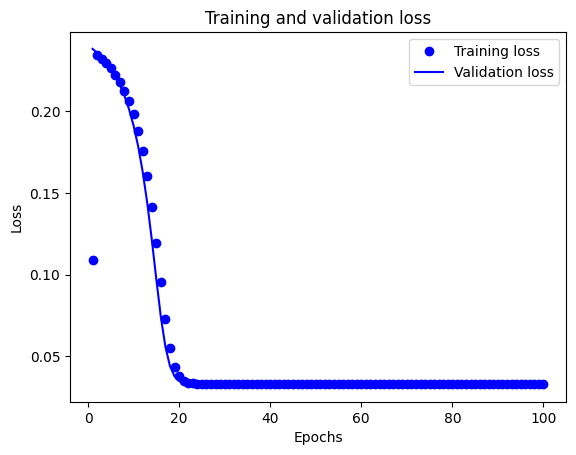

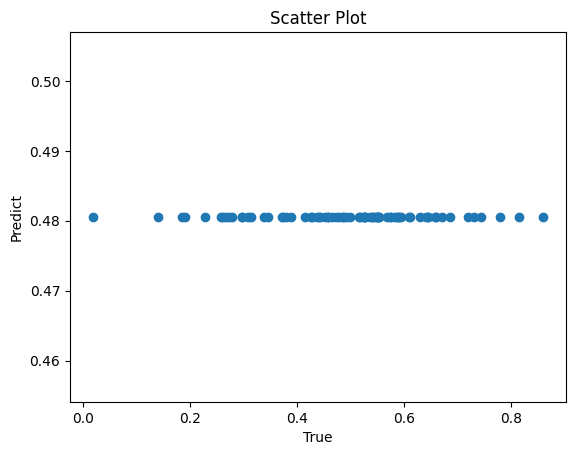

In [978]:
# Visualizing losses and prediction
# DO NOT MODIFY THIS PART

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Scatter Plot')
plt.xlabel('True')
plt.ylabel('Predict')
plt.scatter(y_test, y_pred)